# Netflix Content Data Analysis

This notebook performs an exploratory data analysis of the Netflix Movies and TV Shows dataset, focusing on content types, temporal trends, geographical distribution, and popular genres.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('netflix_titles.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


# 1. Data Loading and Initial Exploration

Upon loading the dataset, we can observe its structure and identify potential issues such as missing values and data types. The `df.info()` output below provides a summary.

In [12]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
print("\nDataFrame Info after cleaning:")
df.info()
print("\nMissing values after initial cleaning:")
print(df.isnull().sum())


DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 927.8+ KB

Missing values after initial clea

# 2. Data Cleaning and Preprocessing

Real-world datasets often require cleaning to handle missing values, correct data types, and standardize formats. In this step, we address missing entries in key columns like 'director', 'cast', 'country', and 'rating' by imputing them or dropping relevant rows. Crucially, the 'date_added' column is converted to a datetime format for time-series analysis, and a 'year_added' column is extracted.

In [13]:
df_sorted_by_release_year = df.sort_values(by='release_year', ascending=False)
print("\nTop 5 content by release year (most recent):")
print(df_sorted_by_release_year[['title', 'type', 'release_year']].head())

df_sorted_by_added_date = df.sort_values(by='date_added', ascending=True)
print("\nTop 5 content by date added (oldest added first):")
print(df_sorted_by_added_date[['title', 'type', 'date_added']].head())


Top 5 content by release year (most recent):
                       title     type  release_year
1              Blood & Water  TV Show          2021
8437  The Netflix Afterparty  TV Show          2021
31        Chicago Party Aunt  TV Show          2021
30           Ankahi Kahaniya    Movie          2021
25      Love on the Spectrum  TV Show          2021

Top 5 content by date added (oldest added first):
                            title     type date_added
5957         To and From New York    Movie 2008-01-01
6611              Dinner for Five  TV Show 2008-02-04
5956      Just Another Love Story    Movie 2009-05-05
5955                     Splatter    Movie 2009-11-18
7370  Mad Ron's Prevues from Hell    Movie 2010-11-01


# 3. Content Overview & Distribution

Understanding the fundamental breakdown of content is essential. Here, we analyze the distribution of Movies versus TV Shows on Netflix, providing a foundational insight into the platform's content strategy.


Content Type Distribution:
type
Movie      6131
TV Show    2666
Name: count, dtype: int64


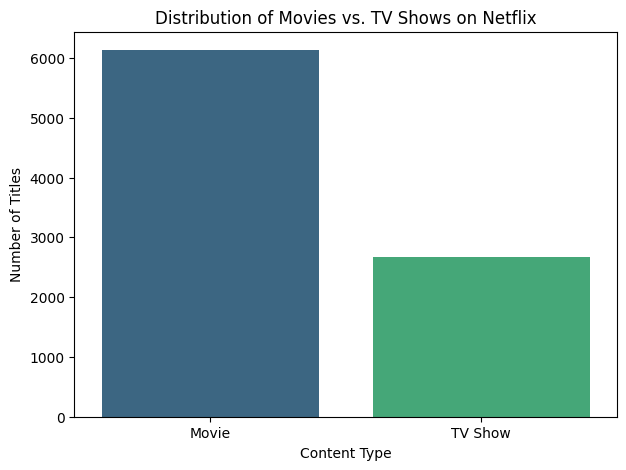

In [16]:
content_counts = df['type'].value_counts()
print("\nContent Type Distribution:")
print(content_counts)
plt.figure(figsize=(7, 5))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis', hue=content_counts.index, legend=False)
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

# 4. Geographical Content Analysis

This section explores the geographical distribution of content on Netflix. We identify the top countries contributing to the Netflix library, shedding light on the primary sources of its diverse catalog.


Top 10 Countries with Most Content:
country
United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


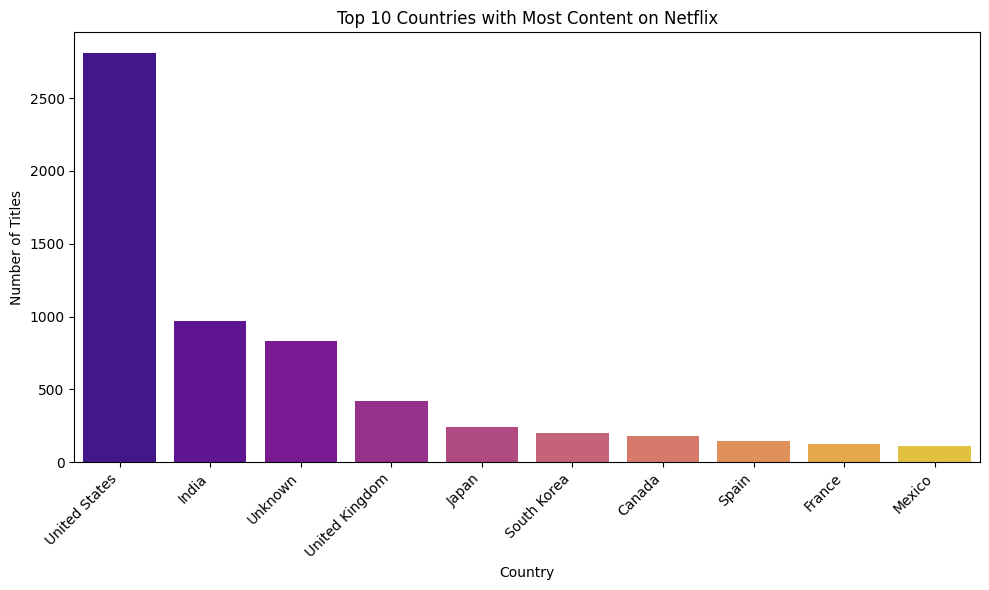

In [14]:
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 Countries with Most Content:")
print(top_countries)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Popular Genre Categories

Netflix offers content across numerous genres. This analysis breaks down the 'listed_in' column to identify the most prevalent genre categories, giving an overview of the content types that dominate the platform.


Top 10 Genres/Categories:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


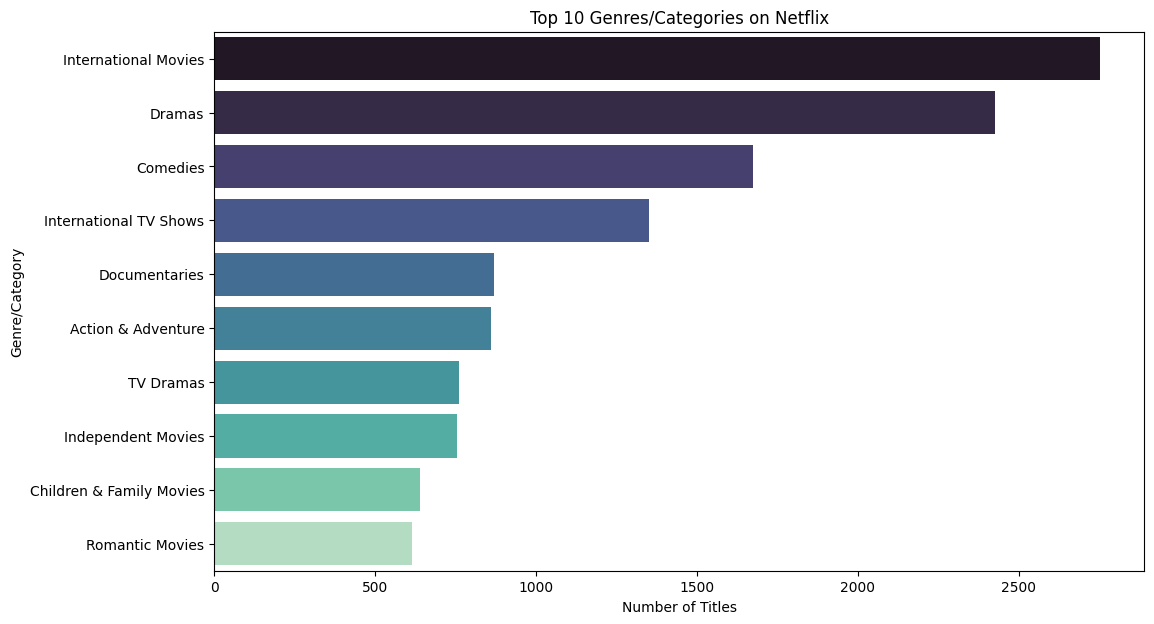

In [15]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
print("\nTop 10 Genres/Categories:")
print(top_genres)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako', hue=top_genres.index, legend=False)
plt.title('Top 10 Genres/Categories on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre/Category')
plt.show()

# 7. Analyzing Content Duration

This section delves into the 'duration' of content, differentiating between movies (in minutes) and TV shows (in seasons). We'll calculate the average movie duration and visualize the distribution of TV show seasons.


Average Movie Duration: 99.58 minutes

TV Show Season Distribution:
duration_seasons
1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
11       1
12       2
13       2
15       2
17       1
Name: count, dtype: int64


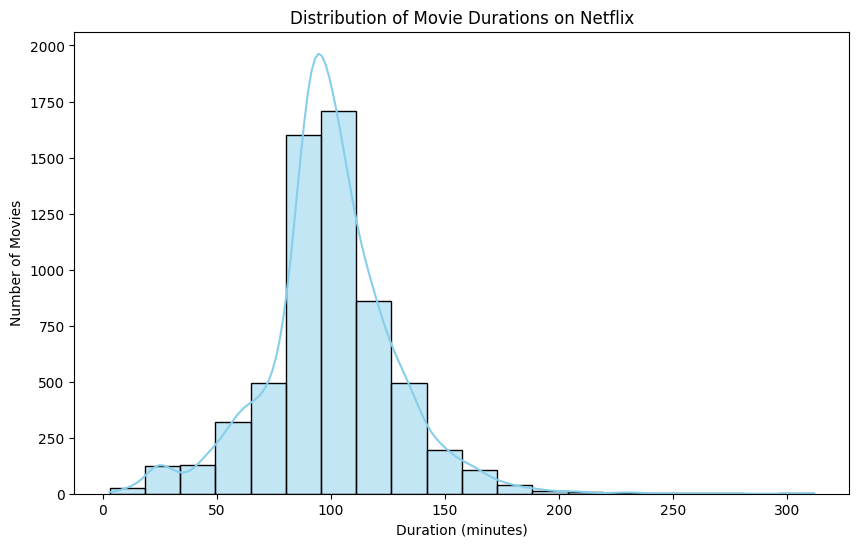

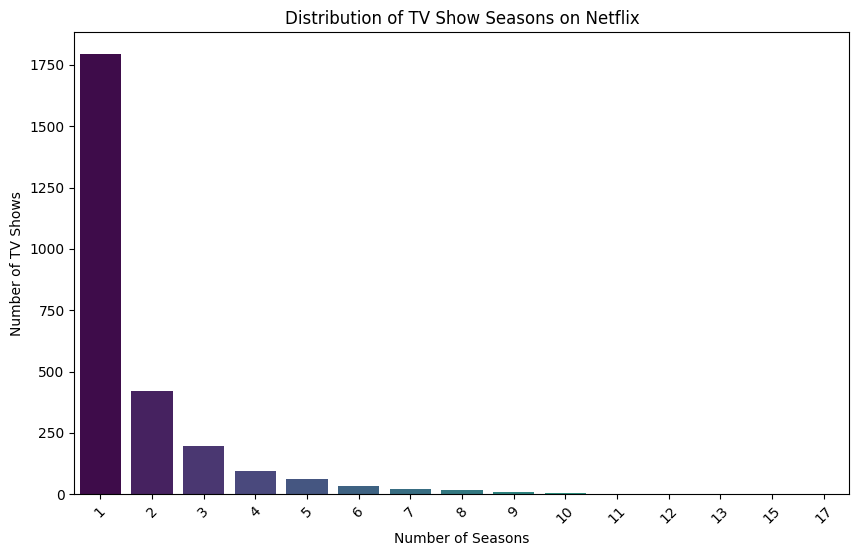

In [17]:
# Separate content types
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Drop missing movie durations
movies_df.dropna(subset=['duration'], inplace=True)

# Convert movie duration
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Drop missing TV show durations
tv_shows_df.dropna(subset=['duration'], inplace=True)

# Convert TV show duration
tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.replace(' Season[s]?', '', regex=True).astype(int)

# Avg movie duration
average_movie_duration = movies_df['duration_minutes'].mean()
print(f"\nAverage Movie Duration: {average_movie_duration:.2f} minutes")

# TV show seasons
season_counts = tv_shows_df['duration_seasons'].value_counts().sort_index()
print("\nTV Show Season Distribution:")
print(season_counts)

# Plot movie duration
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_minutes'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Plot TV show seasons
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis', hue=season_counts.index, legend=False)
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

# 8. Uncovering Key Creators: Directors and Actors

Here, we identify and visualize the most prolific directors and frequently appearing cast members on Netflix. This analysis provides insights into who is shaping the content available on the platform.


Top 10 Directors on Netflix:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: count, dtype: int64


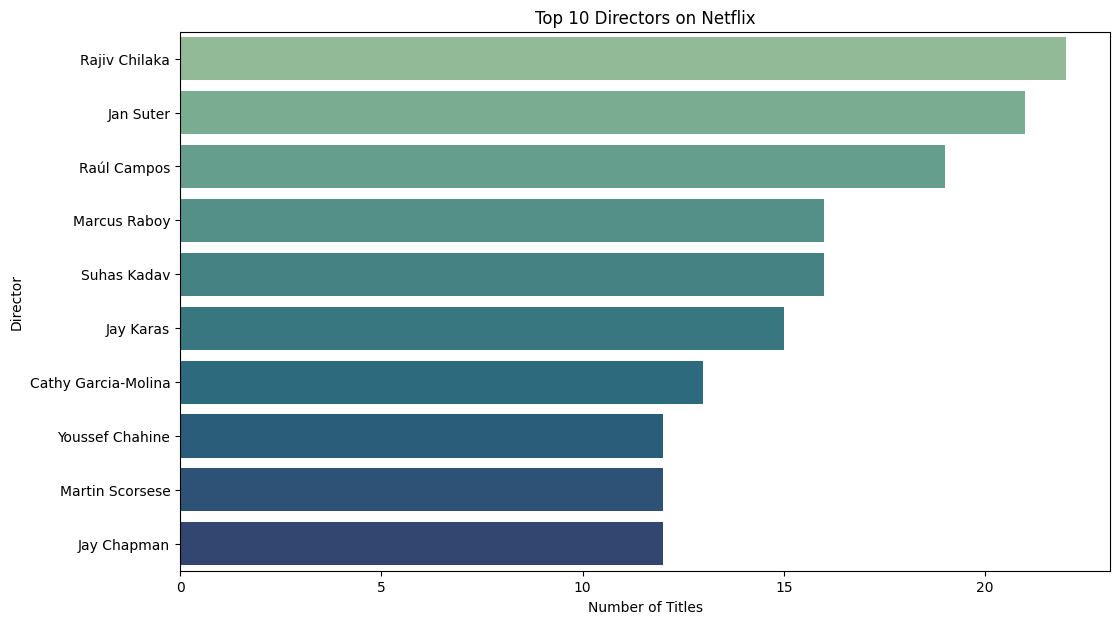


Top 10 Actors/Cast on Netflix:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


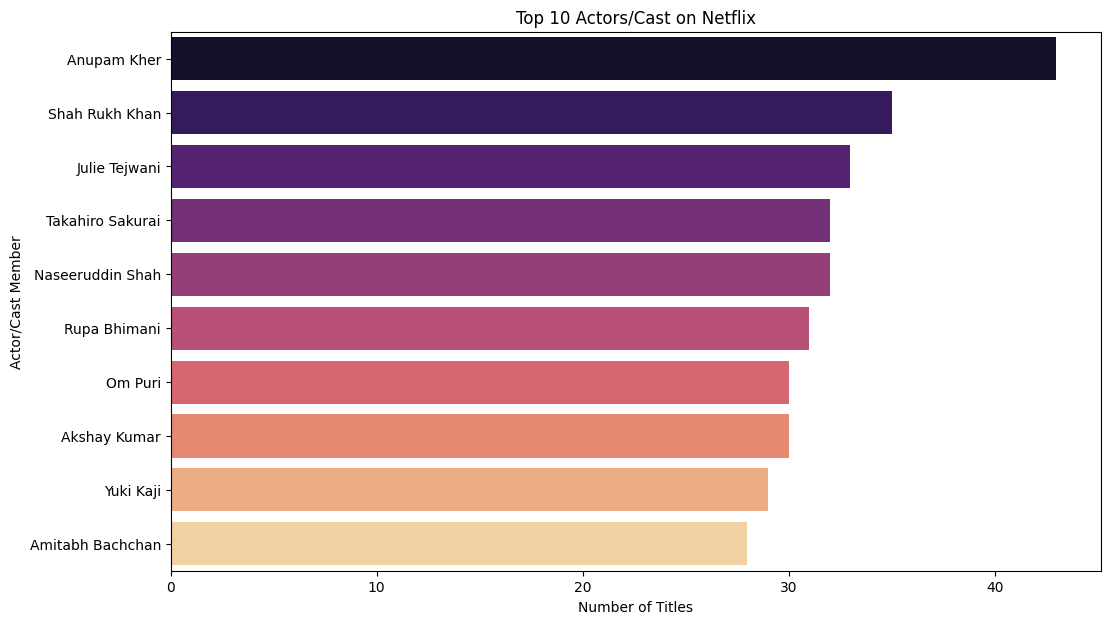

In [18]:
# Function to get top entities from a comma-separated column
def get_top_entities(df, column_name, top_n=10):
    entities = df[column_name].dropna().str.split(', ').explode()
    entities = entities[entities != 'Unknown']
    return entities.value_counts().head(top_n)

# Top 10 Directors
top_directors = get_top_entities(df, 'director', 10)
print("\nTop 10 Directors on Netflix:")
print(top_directors)

# Plot Top 10 Directors
plt.figure(figsize=(12, 7))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest', hue=top_directors.index, legend=False)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Top 10 Actors/Cast
top_cast = get_top_entities(df, 'cast', 10)
print("\nTop 10 Actors/Cast on Netflix:")
print(top_cast)

# Plot Top 10 Actors/Cast
plt.figure(figsize=(12, 7))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='magma', hue=top_cast.index, legend=False)
plt.title('Top 10 Actors/Cast on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor/Cast Member')
plt.show()

# 9. Evolution of Content Ratings Over Time

This section explores how the distribution of content ratings added to Netflix has changed throughout the years. We'll observe trends in the types of content ratings becoming more or less prevalent on the platform.


Content Ratings Added Per Year (sample):
rating      66 min  74 min  84 min   G  NC-17  NR  PG  PG-13    R  TV-14  \
year_added                                                                 
2017             0       1       0   4      1  24  19     26   66    326   
2018             0       0       0  12      0  14  33     53  129    451   
2019             0       0       0   8      1   4  81    135  208    494   
2020             0       0       0   9      0   0  86    122  188    439   
2021             0       0       0   4      0   0  58    146  190    326   

rating      TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
year_added                                                 
2017          23    448    168    35     45         1   1  
2018          36    651    184    40     45         1   0  
2019          40    736    198    54     54         1   2  
2020          61    671    146   102     55         0   0  
2021          44    489     97    57     87         0   0  


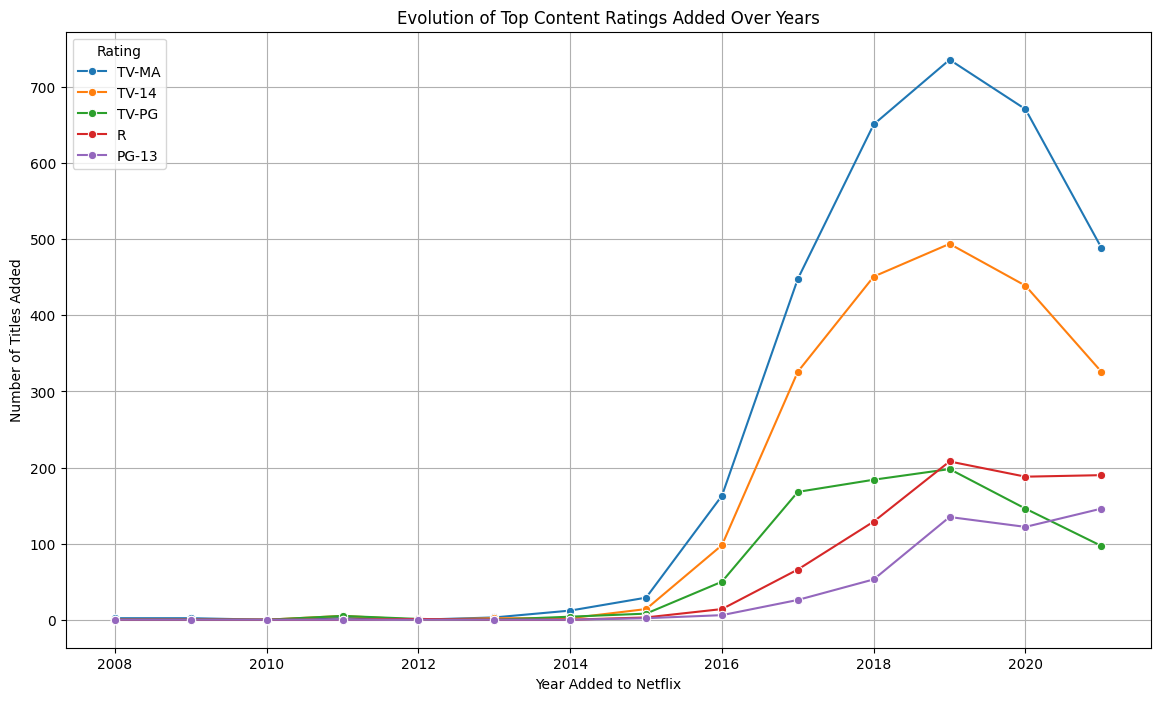

In [19]:
# Ratings added per year
rating_over_time = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

print("\nContent Ratings Added Per Year (sample):")
print(rating_over_time.tail())

# Plotting common ratings over time
common_ratings = df['rating'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
for rating in common_ratings:
    if rating in rating_over_time.columns:
        sns.lineplot(x=rating_over_time.index, y=rating_over_time[rating], label=rating, marker='o')

plt.title('Evolution of Top Content Ratings Added Over Years')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Rating')
plt.show()

# 10. Geographical Genre Specialization

Finally, we investigate whether certain countries tend to produce content within specific genres more than others. A stacked bar chart will illustrate the genre distribution for the top content-producing countries on Netflix.

C:\Users\Ronald\AppData\Local\Temp\ipykernel_22284\1140581412.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


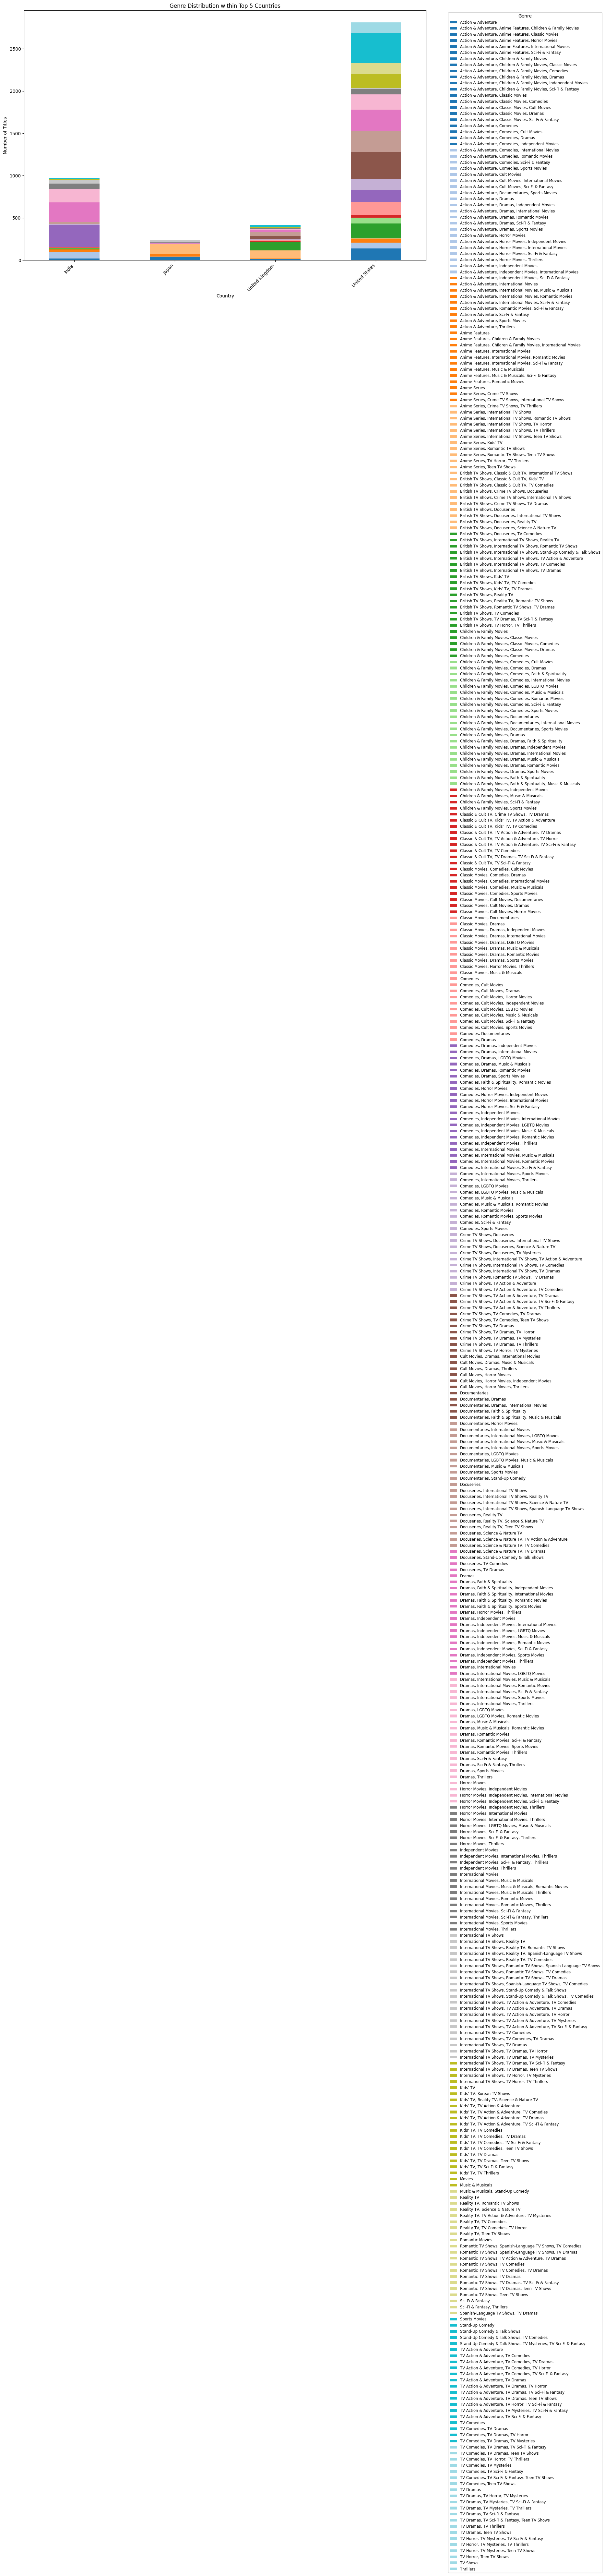

In [27]:
#this section has to be the " most time spent " part of this project, ong dont run this section if you dont want disappointment
# Create a temporary DataFrame focusing on relevant columns for explosion
# Reset the index to ensure a unique index for subsequent operations
df_temp = df[['show_id', 'country', 'listed_in']].copy().reset_index(drop=True)

# Explode 'country' first
# This creates duplicate 'show_id' entries, but the index is new and unique
df_countries_exploded = df_temp.explode('country')

# Now explode 'listed_in' from the already country-exploded DataFrame
# This will create the Cartesian product of (show_id, country, genre)
df_exploded_country_genre = df_countries_exploded.explode('listed_in')

# Clean up the exploded DataFrame
df_exploded_country_genre = df_exploded_country_genre.drop_duplicates(subset=['show_id', 'country', 'listed_in'])

# Filter out 'Unknown' values (make sure these are actual string 'Unknown')
df_exploded_country_genre = df_exploded_country_genre[
    (df_exploded_country_genre['country'] != 'Unknown') &
    (df_exploded_country_genre['listed_in'] != 'Unknown')
]

# Group by country and genre, count titles
country_genre_counts = df_exploded_country_genre.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Get top 5 countries from the original (cleaned) df
top_5_countries = df['country'].value_counts().head(5).index.tolist()

# Remove 'Unknown' from top_5_countries if it got there
if 'Unknown' in top_5_countries:
    top_5_countries.remove('Unknown')

# Filter for top 5 countries
country_genre_top_5 = country_genre_counts[country_genre_counts['country'].isin(top_5_countries)]

# Create pivot table for plotting
if not country_genre_top_5.empty:
    pivot_table_country_genre = country_genre_top_5.pivot_table(index='country', columns='listed_in', values='count', fill_value=0)

    # Plot stacked bar chart
    plt.figure(figsize=(16, 10))
    # Note: .plot() method on DataFrame returns the axis object
    ax = pivot_table_country_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca(), figsize=(16,10))
    plt.title('Genre Distribution within Top 5 Countries')
    plt.xlabel('Country')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough data to generate genre distribution plot for top 5 countries.")